In [1]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import*
from matplotlib import rc
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matplotlib.style.use('seaborn-notebook')
%matplotlib inline
plt.close('all')
from sklearn.cluster import KMeans

In [10]:
df=pd.read_excel ("./Продуктивность по возрастам 1.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: './Продуктивность по возрастам 1.xlsx'

In [4]:
df.info

<bound method DataFrame.info of      Удой за 305, кг - 1 л.  Удой за 305, кг - 2 л.  Удой за 305, кг - 3 л.
0                      9480                   11351                   12474
1                     10286                   14395                   13018
2                     11960                   12123                   11430
3                     10557                   10813                   11114
4                      8892                   10025                   10857
..                      ...                     ...                     ...
333                    8982                    9822                   12297
334                    8304                   12010                   12029
335                    8386                    9666                   11221
336                    8124                   10418                   12333
337                    8236                   11537                   14435

[338 rows x 3 columns]>

In [5]:
import statsmodels.api as sm

In [6]:
X = df["Удой за 305, кг - 1 л."]
y = df["Удой за 305, кг - 2 л."]

In [7]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Удой за 305, кг - 2 л.   R-squared (uncentered):                   0.975
Model:                                OLS   Adj. R-squared (uncentered):              0.975
Method:                     Least Squares   F-statistic:                          1.331e+04
Date:                    Sat, 11 Sep 2021   Prob (F-statistic):                   5.98e-273
Time:                            23:55:43   Log-Likelihood:                         -2988.7
No. Observations:                     338   AIC:                                      5979.
Df Residuals:                         337   BIC:                                      5983.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Удой за 305, кг - 1 л.     1.1255      0.010    115.384      0.000       1.106       1.145
==============================================================================
Omnibus:                        0.902   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                0.660
Skew:                          -0.015   Prob(JB):                        0.719
Kurtosis:                       3.214   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
X = df["Удой за 305, кг - 2 л."]
y = df["Удой за 305, кг - 3 л."]

In [10]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Удой за 305, кг - 3 л.   R-squared (uncentered):                   0.972
Model:                                OLS   Adj. R-squared (uncentered):              0.972
Method:                     Least Squares   F-statistic:                          1.156e+04
Date:                    Sat, 11 Sep 2021   Prob (F-statistic):                   7.02e-263
Time:                            23:56:57   Log-Likelihood:                         -3030.9
No. Observations:                     338   AIC:                                      6064.
Df Residuals:                         337   BIC:                                      6068.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Удой за 305, кг - 2 л.     1.0427      0.010    107.511      0.000       1.024       1.062
==============================================================================
Omnibus:                        7.215   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.545
Skew:                          -0.104   Prob(JB):                        0.103
Kurtosis:                       2.471   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

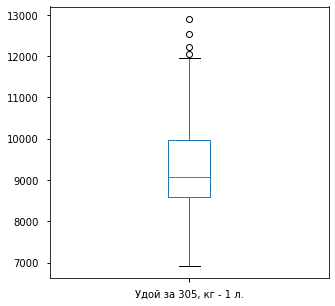

In [12]:
df.plot.box(y=[0], figsize=(5,5))

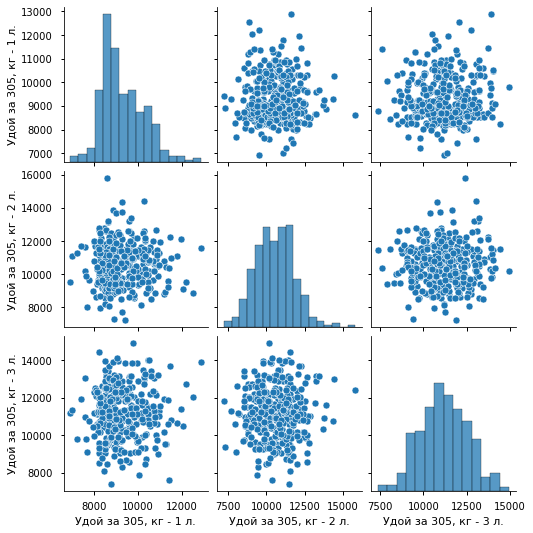

In [13]:
sns.pairplot(df)

C:\Users\mtaig\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

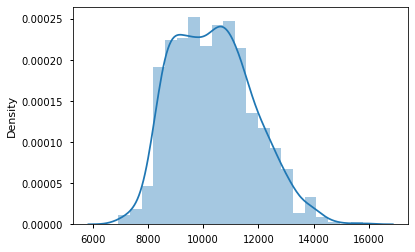

In [20]:
sns.distplot(df)

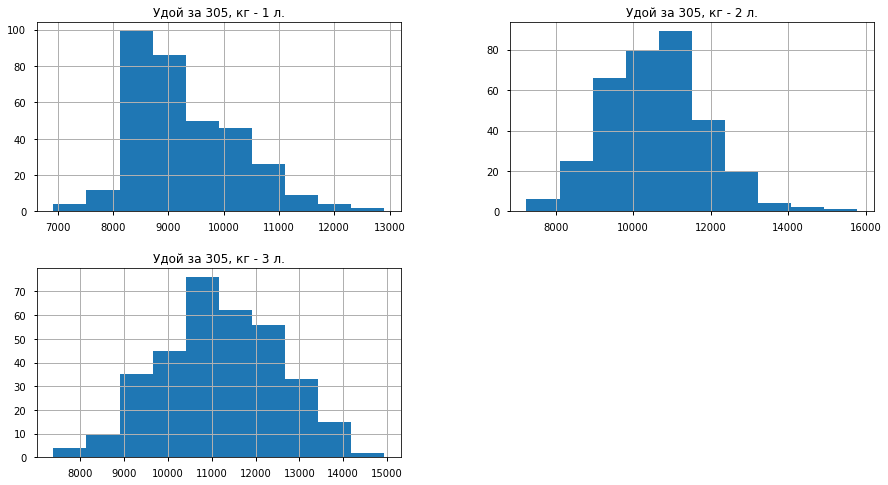

In [21]:
hist = df.hist(figsize=(15,8))

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
df.iloc[:,0].values

array([ 9480, 10286, 11960, 10557,  8892, 12220,  8555, 10199,  9967,
        8720,  9201,  9291,  8907, 10716,  8666, 10731,  9148,  8688,
       10353,  8536, 10257,  8712, 10306,  8800,  9627,  9158, 10378,
       10963, 11196,  9815,  9983, 11185,  9993, 10934,  9968, 10762,
        8815,  8919,  8900,  9180,  8883,  8666,  8451,  8484,  9790,
        8129,  9323, 10326, 10603,  8454, 10517,  9129,  8617,  9828,
       11458,  8270, 10168,  8734,  9647, 10762,  8662, 12063,  8509,
        8662,  8155, 10549,  9457, 11297,  9816, 10192,  9612,  9002,
       10476, 10861, 10812,  9402,  9669, 10391,  9444,  8742,  7994,
       10033,  8792, 10036,  9557,  8881, 11373,  8891,  9966,  8216,
        9887, 10153, 10607,  7606, 11267, 10493,  8212,  8215,  7430,
        9630,  8080,  9682, 10380,  7799, 10797,  8530,  8650,  6921,
        8218,  8355,  8524,  9094,  8829, 10465,  8486, 10263,  9101,
        8507,  9064, 10243,  8244,  8280,  8232,  8250,  8475,  8180,
        8881,  8519,

In [24]:
x=df.iloc[:, [0,1,2]].values

In [25]:
kmeans5 = KMeans(n_clusters=3)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 0 0 2 1 1 2 1 2 2 2 0 2 1 2 2 1 1 2 1 2 0 0 2 2 2 2 0 0 1 2 1 0 2 0 1 0
 0 1 2 0 0 2 0 1 1 0 2 1 2 2 2 0 1 0 1 1 1 0 0 0 1 0 2 2 2 2 2 0 2 1 2 1 2
 0 1 2 1 0 1 0 2 2 1 0 1 1 1 2 2 2 2 0 0 2 1 1 1 0 0 1 0 1 1 2 0 2 1 2 1 1
 2 1 0 1 0 1 1 0 0 2 1 2 1 2 1 1 1 2 2 0 1 0 1 0 1 1 2 0 2 0 1 2 0 1 0 1 2
 0 1 0 1 1 2 1 0 0 2 1 0 1 0 0 1 1 0 2 2 1 2 1 0 1 2 1 1 1 1 2 2 1 2 0 2 2
 1 1 1 1 0 2 1 0 2 0 0 0 1 2 1 1 1 0 1 0 0 0 2 0 2 0 1 0 0 2 1 2 0 2 1 2 0
 0 0 0 0 1 0 1 0 1 0 0 0 2 2 0 0 2 2 0 1 2 0 2 0 1 1 1 0 2 2 2 0 0 0 0 2 0
 2 1 1 2 0 0 2 2 2 2 1 2 1 2 2 0 2 0 2 1 2 0 1 0 2 1 1 2 1 1 2 0 0 2 1 0 0
 0 2 0 2 2 0 2 0 2 2 2 1 2 1 0 2 0 1 2 0 2 2 1 2 1 1 1 2 0 0 0 2 2 0 2 2 1
 1 0 1 0 0]


array([[ 9233.44247788, 11581.18584071, 12186.52212389],
       [ 9275.91818182,  9282.05454545, 11606.15454545],
       [ 9393.50434783, 10845.29565217,  9815.70434783]])

In [1]:
Error =[]
for i in range(1, 338):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 338), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

NameError: name 'KMeans' is not defined